# Исследование объявлений о продаже квартир

Данные  — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.  
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Необходимо изучить такие параметры как: площадь, цена, число комнат, высота потолков,время продажи квартиры.Какие факторы больше всего влияют на стоимость квартиры? Выявить 10 населённых пунктов с наибольшим числом объявлений. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

##### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('real_estate_data.csv',sep='\t')
display(df.head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# пропуски
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [4]:
len(df)

23699

In [5]:
# посмотрим количество уникальных значений в столбцах где есть пропуски
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [6]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [7]:
df['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [8]:
#есть высота стен более 6 и это очень странно. посмотрим какое количество этих позиций
df.query('ceiling_height>6').count()

total_images            29
last_price              29
total_area              29
first_day_exposition    29
rooms                   29
ceiling_height          29
floors_total            29
living_area             29
floor                   29
is_apartment            13
studio                  29
open_plan               29
kitchen_area            23
balcony                 20
locality_name           29
airports_nearest        19
cityCenters_nearest     19
parks_around3000        19
parks_nearest            9
ponds_around3000        19
ponds_nearest            9
days_exposition         23
dtype: int64

In [9]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [10]:
# количество дубликатов
df.duplicated().sum()

0

In [11]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В датафрейме 23699 объявлений. Некоторые данные указаны корректно, некоторые нет (высота потолков 20,100 метров; размещение объявления больше года). Некоторая инфо заполнена полностью; но в некоторых столбцах есть пропуски (ceiling_height, living_area, is_apartament, balcony...).Для последующего анализа данных необходимо выполнить преобработку данных

### предобработка данных

In [12]:
#первый столбец с пропущенными данными - ceiling_height. Для того чтобы заполнить пропуски - сначало избавимся от потолков выше
#5 метров (скорее всего это отпечатка);расчитаем среднюю высоту у квартир менее 5 меетров
ceiling_mean=df[df['ceiling_height']<=5]['ceiling_height'].mean()

In [13]:
#заменим слишком высыокие потолки на средний показатель
df.loc[df['ceiling_height']>5,'ceiling_height']=ceiling_mean

In [14]:
#проверим
df.loc[df['ceiling_height']>5,'ceiling_height'].value_counts()


Series([], Name: ceiling_height, dtype: int64)

In [15]:
# для запослнения пропусков расчитаем среднюю высоту и заполним пропуски:
ceiling_avr=df['ceiling_height'].mean()
ceiling_avr

2.7251465302736535

In [16]:
df['ceiling_height'].isna().mean()

0.38799105447487237

In [17]:
for element in df['floors_total'].unique():
    ceiling_avr=df['ceiling_height'][df['floors_total']== element].mean()
    df.loc[df['floors_total']== element,'ceiling_height']=df.loc[df['floors_total']== element,'ceiling_height']\
                         .fillna(ceiling_avr)

In [18]:
df['ceiling_height'].isna().mean()

0.0032912781130005485

In [19]:
# 0.3% пропущенной инфо заполним средним значением
df['ceiling_height']=df['ceiling_height'].fillna(ceiling_avr)

In [20]:
# floors_total заполним пропуски средним значением
floors_total_avr=df['floors_total'].median()
df['floors_total']=df['floors_total'].fillna(floors_total_avr)

In [21]:
df[df['ceiling_height'].isnull()].count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [22]:
#заполняем пропуски в living_area
df['living_area'].isna().mean()

0.08029874678256467

In [23]:
#найдем долю жилой площади; расчитаем среднюю долю; заполним пропуски как часть общей площати.
part_living_area=df['living_area']/df['total_area']
part_liv_area_avr=part_living_area.mean()
df['living_area']=df['living_area'].fillna(part_liv_area_avr*df['total_area'])

In [24]:
# следующий столбец - is_apartment
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [25]:
#из всех объявлений - всего 50 апартаментов; апартаменты - очень редки; будем считать если нет инфо - значит это квартира
df['is_apartment']=df['is_apartment'].fillna(0)


In [26]:
df['is_apartment']=df['is_apartment']*1

In [27]:
# kithen_area: тот же принцип что и у жилой площади
df['kitchen_area'].isna().mean()

0.09612219924891345

In [28]:
part_kitchen_area=df['kitchen_area']/df['total_area']
part_kitch_area_avr=part_kitchen_area.mean()
df['kitchen_area']=df['kitchen_area'].fillna(part_kitch_area_avr*df['total_area'])

In [29]:
df['balcony'].isna().mean()

0.4860542638929913

практически 50% нет инфо о наличии балконов

In [30]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [31]:
df['total_area_group']=pd.cut(df['total_area'],10)

In [32]:
# посмотрим какое количество балконов в зависимости от площади недвижимости
df.groupby('total_area_group')['balcony'].agg(['count','mean'])

,count,mean
total_area_group,,
"(11.112, 100.8]",11354,1.147877
"(100.8, 189.6]",701,1.241084
"(189.6, 278.4]",87,0.850575
"(278.4, 367.2]",22,0.727273
"(367.2, 456.0]",9,1.444444
"(456.0, 544.8]",6,0.166667
"(544.8, 633.6]",1,1.000000
"(633.6, 722.4]",0,NaN
"(722.4, 811.2]",0,NaN


In [33]:
df.groupby('balcony')['total_area'].max()

balcony
0.0    500.0
1.0    631.2
2.0    402.0
3.0    401.0
4.0    249.7
5.0    431.0
Name: total_area, dtype: float64

In [34]:
# как видно из группировки балконов нет у квартир площадью более 633 м кв; заменить 48 % на 0 - будет не верно (площади большие, 
# скорее всего балконы есть); заменим пропуски на -1; при дальнейшем анализе будем понимать что -1 у квартир у которых нет инфо
df['balcony']=df['balcony'].fillna(-1)

In [35]:
# не указанный населенный пункт заменим на "no_info"
df['locality_name']=df['locality_name'].fillna('no_info')

In [36]:
df['locality_name'].value_counts()

Санкт-Петербург                               15721
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
посёлок при железнодорожной станции Вещево        1
посёлок Мыза-Ивановка                             1
поселок Красносельское                            1
деревня Раздолье                                  1
село Шум                                          1
Name: locality_name, Length: 365, dtype: int64

In [37]:
df.loc[df['airports_nearest']==0,'airports_nearest'].count()

1

In [38]:
#если растояние до ближайшего аэропорта не указамно - значит ближайшено аэропорта нет; заполним пропуски -1
df['airports_nearest']=df['airports_nearest'].fillna(-1)

In [39]:
df.groupby('parks_around3000')['parks_nearest'].agg(['count','mean'])

,count,mean
parks_around3000,,
0.0,4,3114.250000
1.0,5681,546.246788
2.0,1747,370.634230
3.0,647,312.251932


In [40]:
df['parks_nearest_group']=pd.cut(df['parks_nearest'],10)

In [41]:
df.groupby('parks_nearest_group')['parks_around3000'].agg(['count','mean'])

,count,mean
parks_nearest_group,,
"(-2.189, 319.9]",2379,1.595628
"(319.9, 638.8]",3976,1.373994
"(638.8, 957.7]",1303,1.101305
"(957.7, 1276.6]",195,1.015385
"(1276.6, 1595.5]",73,1.000000
"(1595.5, 1914.4]",31,1.000000
"(1914.4, 2233.3]",56,1.000000
"(2233.3, 2552.2]",51,1.000000
"(2552.2, 2871.1]",7,1.285714


In [42]:
df.loc[df['parks_nearest']<0,'parks_nearest'].count()

0

In [43]:
park_nearest_avr=df['parks_nearest'].mean()


In [44]:
# возможно что было указано о наличии парка, но не запонлена инфо о растоянии до парка; исправим заменой средней; иначе 0
df.loc[df['parks_around3000']>0,'parks_nearest']=df.loc[df['parks_around3000']>0,'parks_nearest'].fillna(park_nearest_avr)

In [45]:
df['parks_around3000']=df['parks_around3000'].fillna(-1)

In [46]:
df['parks_nearest']=df['parks_nearest'].fillna(-1)

In [47]:
ponds_nearest_avr=df['ponds_nearest'].mean()

In [48]:
# также и для водоемов
df.loc[df['ponds_around3000']>0,'ponds_nearest']=df.loc[df['ponds_around3000']>0,'ponds_nearest'].fillna(ponds_nearest_avr)

In [49]:
# пропуски в растоянии до центра заменим -1

df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(-1)

In [50]:
# и наконец то осталось заполнить пропуски в длительности размещения объявления; всего 13%; заполним средним значением
df['days_exposition'].isna().mean()

0.13422507278788134

In [51]:
days_exposition_avr=df['days_exposition'].mean()
df['days_exposition']=df['days_exposition'].fillna(days_exposition_avr)

In [52]:
#проверим заполнены ли все пропуски:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_images          23699 non-null  int64   
 1   last_price            23699 non-null  float64 
 2   total_area            23699 non-null  float64 
 3   first_day_exposition  23699 non-null  object  
 4   rooms                 23699 non-null  int64   
 5   ceiling_height        23699 non-null  float64 
 6   floors_total          23699 non-null  float64 
 7   living_area           23699 non-null  float64 
 8   floor                 23699 non-null  int64   
 9   is_apartment          23699 non-null  object  
 10  studio                23699 non-null  bool    
 11  open_plan             23699 non-null  bool    
 12  kitchen_area          23699 non-null  float64 
 13  balcony               23699 non-null  float64 
 14  locality_name         23699 non-null  object  
 15  ai

In [53]:
# для облегчения анализа переведем тип данных к целочисленному типу
df['last_price']=df['last_price'].astype(int)
df['total_area']=df['total_area'].astype(int)
df['floors_total']=df['floors_total'].astype(int)
df['living_area']=df['living_area'].astype(int)
df['kitchen_area']=df['kitchen_area'].astype(int)
df['balcony']=df['balcony'].astype(int)
df['days_exposition']=df['days_exposition'].astype(int)

Были преобразованы данные:
1. Слишком высокие стены (более 5 метров) заменены на средний показатель у квартир с высотой стен менее 5 метром; пропуски заполнены средним значением
2. Жилая площадь и площадь кухни: так как общая площадь указана у всех объявлений, то расчитав среднюю долю площадей, заполним пропущенные значения
3. аппартаментов всего 50; заменим пропуски на 0
4. большое количество пропусков у количества балконов (48%). Заменим пропуски на -1; при дальнейшем анализе будем понимать что это пропущенная инфо
5. Отсутствующие названия населенных пунктов заменим на "no_info"
6. Растояние до аэропорта - если нет инфо , значит аэропорт далеко  - (-1)
7. Количество парков заменим на средние значение
8. Растояние до парка/пруда. Исходим из того, что если есть инфо о наличии парка, значит информацию не указали. Для этих парков/прудов расчитаем средний показатель. Для остальных - (-1)
9. Растояние до центра- (-1)
10. Длительность объявления не может быть 0, заменяем на среднее количество дней

### Анали данных

In [54]:
# расчитаем цену за квадратный метр
df['price_per_m2']=df['last_price']/df['total_area']
df['price_per_m2']=df['price_per_m2'].astype(int)
df['price_per_m2'].head(5).reset_index()

,index,price_per_m2
0,0,120370
1,1,83750
2,2,92785
3,3,408176
4,4,100000


In [55]:
df['first_day_exposition'].head(10)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object

In [56]:
# расчитаем день недели, месяц и год публикации объявления
df['date']=pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%d')
df['weekday']=df['date'].dt.weekday
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,total_area_group,parks_nearest_group,price_per_m2,date,weekday,month,year
0,20,13000000,108,2019-03-07T00:00:00,3,2.700000,16,51,8,0,...,2.0,755.0,180,"(100.8, 189.6]","(319.9, 638.8]",120370,2019-03-07,3,3,2019
1,7,3350000,40,2018-12-04T00:00:00,1,2.782385,11,18,1,0,...,0.0,NaN,81,"(11.112, 100.8]",NaN,83750,2018-12-04,1,12,2018
2,10,5196000,56,2015-08-20T00:00:00,2,2.705979,5,34,4,0,...,2.0,574.0,558,"(11.112, 100.8]","(-2.189, 319.9]",92785,2015-08-20,3,8,2015


In [57]:
# расчитаем этаж квартиры; варианты — первый, последний, другой; для того чтобы можно было расчитать коэффициент корреляции
# заменим первый на 1, последние этажи на 10 , и остальные на 5:

def floor_group (row):
    floors_total=row['floors_total']
    if (row['floor']==1) or (row['floor']==2):
        return '1'
    if (row['floor']==floors_total) or (row['floor']==floors_total-1):
        return '10'
    return '5'
df['floor_group']=df.apply(floor_group,axis=1).astype(int)


In [58]:
df['floor_group'].value_counts()

5     11403
1      6285
10     6011
Name: floor_group, dtype: int64

In [59]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_group,parks_nearest_group,price_per_m2,date,weekday,month,year,floor_group
0,20,13000000,108,2019-03-07T00:00:00,3,2.700000,16,51,8,0,...,755.0,180,"(100.8, 189.6]","(319.9, 638.8]",120370,2019-03-07,3,3,2019,5
1,7,3350000,40,2018-12-04T00:00:00,1,2.782385,11,18,1,0,...,NaN,81,"(11.112, 100.8]",NaN,83750,2018-12-04,1,12,2018,1
2,10,5196000,56,2015-08-20T00:00:00,2,2.705979,5,34,4,0,...,574.0,558,"(11.112, 100.8]","(-2.189, 319.9]",92785,2015-08-20,3,8,2015,10
3,0,64900000,159,2015-07-24T00:00:00,3,2.640730,14,89,9,0,...,234.0,424,"(100.8, 189.6]","(-2.189, 319.9]",408176,2015-07-24,4,7,2015,5
4,2,10000000,100,2018-06-19T00:00:00,2,3.030000,14,32,13,0,...,48.0,121,"(11.112, 100.8]","(-2.189, 319.9]",100000,2018-06-19,1,6,2018,10


In [60]:
# расчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей
df['part_living_area']=df['living_area']/df['total_area']
df['part_kitchen_area']=df['kitchen_area']/df['total_area']
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_area_group,parks_nearest_group,price_per_m2,date,weekday,month,year,floor_group,part_living_area,part_kitchen_area
0,20,13000000,108,2019-03-07T00:00:00,3,2.700000,16,51,8,0,...,"(100.8, 189.6]","(319.9, 638.8]",120370,2019-03-07,3,3,2019,5,0.472222,0.231481
1,7,3350000,40,2018-12-04T00:00:00,1,2.782385,11,18,1,0,...,"(11.112, 100.8]",NaN,83750,2018-12-04,1,12,2018,1,0.450000,0.275000
2,10,5196000,56,2015-08-20T00:00:00,2,2.705979,5,34,4,0,...,"(11.112, 100.8]","(-2.189, 319.9]",92785,2015-08-20,3,8,2015,10,0.607143,0.142857
3,0,64900000,159,2015-07-24T00:00:00,3,2.640730,14,89,9,0,...,"(100.8, 189.6]","(-2.189, 319.9]",408176,2015-07-24,4,7,2015,5,0.559748,0.182390
4,2,10000000,100,2018-06-19T00:00:00,2,3.030000,14,32,13,0,...,"(11.112, 100.8]","(-2.189, 319.9]",100000,2018-06-19,1,6,2018,10,0.320000,0.410000


Для проведения исследования данных необходимо расчитать цену за квадратный метр, доли жилой площади и кухни. Также отдельно указать день недели, месяц и год публикации. И разделили все этажи на первые, последние и другие

In [61]:
# изучим площадь, цену, число комнат, высота потолков

df.groupby('rooms')['total_area','price_per_m2','last_price','ceiling_height'].agg(['count','mean','min','max'])

C:\Users\MaNi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


total_area                       price_per_m2                         \
           count        mean  min  max        count           mean     min   
rooms                                                                        
0            197   29.081218   15  371          197  109346.543147   34375   
1           8047   37.406860   12  494         8047  101483.694420   11000   
2           7940   55.625945   20  196         7940   95892.618388     111   
3           5814   77.543000   40  363         5814   97435.063467   10507   
4           1180  107.394068   42  500         1180  110568.977966   13483   
5            326  161.306748   40  507          326  126885.331288   14347   
6            105  201.342857   87  500          105  140845.542857   29072   
7             59  265.169492  100  631           59  163647.627119   39303   
8             12  259.083333  150  373           12  184704.333333   66949   
9              8  305.750000  235  400            8  105093.375000   63106   
10             3  259.333333  216  290            3   98082.666667   71759   
11             2  188.500000  183  194            2  132865.500000   95628   
12             1  900.000000  900  900            1  466666.000000  466666   
14             2  304.000000  245  363            2   92922.500000   68870   
15             1  590.000000  590  590            1  110169.000000  110169   
16             1  270.000000  270  270            1  105555.000000  105555   
19             1  374.000000  374  374            1   86229.000000   86229   

               last_price                                     ceiling_height  \
           max      count          mean        min        max          count   
rooms                                                                          
0       231960        197  3.337724e+06     945750   71000000            197   
1       848484       8047  3.835362e+06     430000   43511000           8047   
2      1546729       7940  5.591605e+06      12190  289238400           7940   
3      1736842       5814  8.179119e+06     550000  330000000           5814   
4      1000000       1180  1.342350e+07     999000  159984000           1180   
5      1000748        326  2.376208e+07    1650000  401300000            326   
6       859649        105  3.170975e+07    4390000  245000000            105   
7      1907500         59  5.147007e+07    7900000  763000000             59   
8       652173         12  5.022417e+07   15800000  180000000             12   
9       220000          8  3.415236e+07   17000000   88000000              8   
10      137931          3  2.616667e+07   15500000   40000000              3   
11      170103          2  2.525000e+07   17500000   33000000              2   
12      466666          1  4.200000e+08  420000000  420000000              1   
14      116975          2  2.682950e+07   25000000   28659000              2   
15      110169          1  6.500000e+07   65000000   65000000              1   
16      105555          1  2.850000e+07   28500000   28500000              1   
19       86229          1  3.225000e+07   32250000   32250000              1   

                                     
           mean       min       max  
rooms                                
0      2.728840  1.750000  3.570000  
1      2.685642  1.750000  5.000000  
2      2.707583  1.000000  4.800000  
3      2.736543  1.750000  4.500000  
4      2.845526  1.750000  4.500000  
5      3.050152  1.750000  4.900000  
6      3.116906  2.500000  4.500000  
7      3.261563  2.570000  4.650000  
8      3.170899  2.705979  4.000000  
9      3.019497  2.500000  3.350000  
10     3.263333  3.140000  3.500000  
11     3.415000  3.400000  3.430000  
12     2.800000  2.800000  2.800000  
14     3.058032  2.956065  3.160000  
15     3.500000  3.500000  3.500000  
16     3.000000  3.000000  3.000000  
19     2.705979  2.705979  2.705979

группировка показала очень странную цену - 111

In [62]:
df.loc[df['price_per_m2']<1000,'total_area'].agg(['count','mean'])

count      1.0
mean     109.0
Name: total_area, dtype: float64

2-х комнатная квартира площадью 109 м кв ценой менее 1000; так как это всего лишь 1 объявление - влияние этой цены на анализ
цен очень незначителен

In [63]:
df=df.loc[df['price_per_m2']>1000]

In [64]:
column=['last_price','price_per_m2','total_area','rooms','ceiling_height','floor', 'is_apartment']
flat=pd.DataFrame(data=df,columns=column)

In [65]:
flat.pivot_table(index='is_apartment',values=['total_area','price_per_m2','rooms','ceiling_height'],aggfunc=['mean','max','min'])

mean                                      \
             ceiling_height   price_per_m2     rooms total_area   
is_apartment                                                      
0                  2.722046   99774.160902  2.070619    60.0699   
1                  3.048893  148951.700000  2.080000    83.0800   

                        max                                          min  \
             ceiling_height price_per_m2 rooms total_area ceiling_height   
is_apartment                                                               
0                       5.0      1907500    19        900            1.0   
1                       4.5       600000     7        507            2.5   

                                            
             price_per_m2 rooms total_area  
is_apartment                                
0                    7962     0         12  
1                   40816     1         20

В среднем квартиры со стандартной высотой потолков (2.72 м). Цена за кв метр 99770 руб. В основном это двухкомнатные кватриры с площадью 60 м кв.

In [66]:
column=['last_price','price_per_m2','total_area','rooms','ceiling_height']
factor=pd.DataFrame(data=df,columns=column)

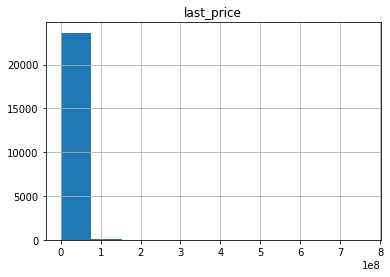

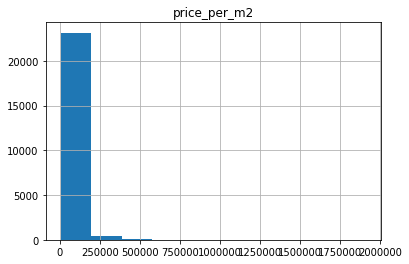

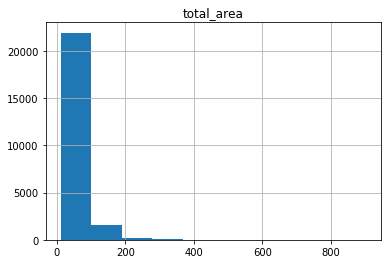

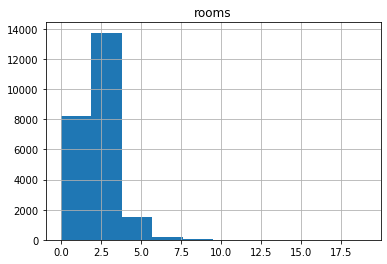

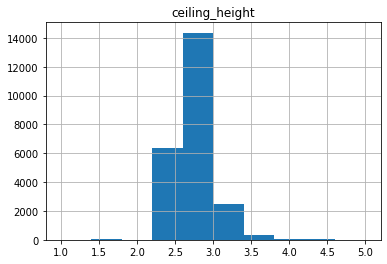

In [67]:
%matplotlib inline
for column in factor:
    
    factor.hist(column)
    plt.show()

наблюдается большое разнообразие квартир - по количеству комнат, площади, ценам, этажности и т.д. Какие факторы влияют на цену изучим далее. Но для начала построим гистограмму для каждого параметра

In [68]:
# Изучим время продажи
df['days_group']=pd.cut(df['days_exposition'],10)

In [69]:
df.groupby('days_group')['last_price'].agg(['count','median','mean'])

,count,median,mean
days_group,,,
"(-0.579, 158.9]",13266,4400000,5.706254e+06
"(158.9, 316.8]",6746,5050000,7.473021e+06
"(316.8, 474.7]",1746,4790000,7.314550e+06
"(474.7, 632.6]",871,5049000,7.927698e+06
"(632.6, 790.5]",455,5200000,7.895214e+06
"(790.5, 948.4]",275,5672000,9.203391e+06
"(948.4, 1106.3]",182,5425000,9.022046e+06
"(1106.3, 1264.2]",92,6025000,8.692999e+06
"(1264.2, 1422.1]",49,8000000,1.010971e+07


In [70]:
df['days_exposition'].describe()

count    23698.000000
mean       180.776648
std        204.451150
min          1.000000
25%         45.000000
50%        124.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

среднее количество дней продажи 180 дней, медианное количество дней продажи 124, самая быстрая продажа 1 день, самая долгая продажа 1580 дней.

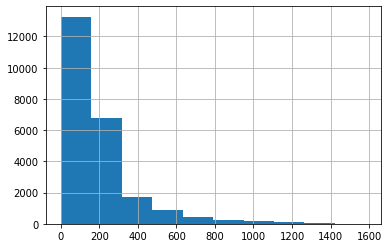

In [71]:
df['days_exposition'].hist()

В среднем продажа квартиры занимала 180 дня. Самая быстрая продажа - за 1 день, а самая долгая 1580 дней. Продажи дольше 632 дня - большая редкость.

In [72]:
# исключим из долнейшего анализа слишком долгие продажи (более 632 дня)
good_day=df[df['days_exposition']<632]

In [73]:
good_day.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest_group,price_per_m2,date,weekday,month,year,floor_group,part_living_area,part_kitchen_area,days_group
0,20,13000000,108,2019-03-07T00:00:00,3,2.700000,16,51,8,0,...,"(319.9, 638.8]",120370,2019-03-07,3,3,2019,5,0.472222,0.231481,"(158.9, 316.8]"
1,7,3350000,40,2018-12-04T00:00:00,1,2.782385,11,18,1,0,...,NaN,83750,2018-12-04,1,12,2018,1,0.450000,0.275000,"(-0.579, 158.9]"
2,10,5196000,56,2015-08-20T00:00:00,2,2.705979,5,34,4,0,...,"(-2.189, 319.9]",92785,2015-08-20,3,8,2015,10,0.607143,0.142857,"(474.7, 632.6]"


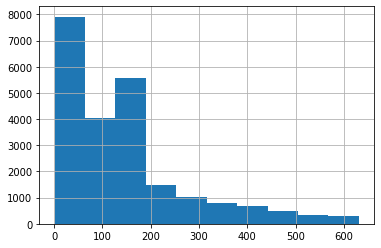

In [74]:
# гистграмма показываем исключение слишком долгих продаж
good_day['days_exposition'].hist()

постоим график для days_exposition менее 200 дней 

In [75]:
extragood_day=df[df['days_exposition']<200]

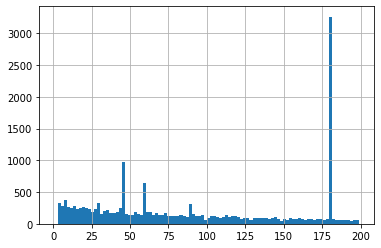

In [76]:
extragood_day['days_exposition'].hist(bins=100,grid=True)

при средней цене за кв метр 99770 - двухкомнатная квартира 1546000 за кв метр продалась менее чем за 200 дней - явно что то не то. воспользуемся диаграмой размаха для изучения выброса

In [77]:
extragood_day.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest_group,price_per_m2,date,weekday,month,year,floor_group,part_living_area,part_kitchen_area,days_group
0,20,13000000,108,2019-03-07T00:00:00,3,2.700000,16,51,8,0,...,"(319.9, 638.8]",120370,2019-03-07,3,3,2019,5,0.472222,0.231481,"(158.9, 316.8]"
1,7,3350000,40,2018-12-04T00:00:00,1,2.782385,11,18,1,0,...,NaN,83750,2018-12-04,1,12,2018,1,0.450000,0.275000,"(-0.579, 158.9]"
4,2,10000000,100,2018-06-19T00:00:00,2,3.030000,14,32,13,0,...,"(-2.189, 319.9]",100000,2018-06-19,1,6,2018,10,0.320000,0.410000,"(-0.579, 158.9]"


(0, 30)

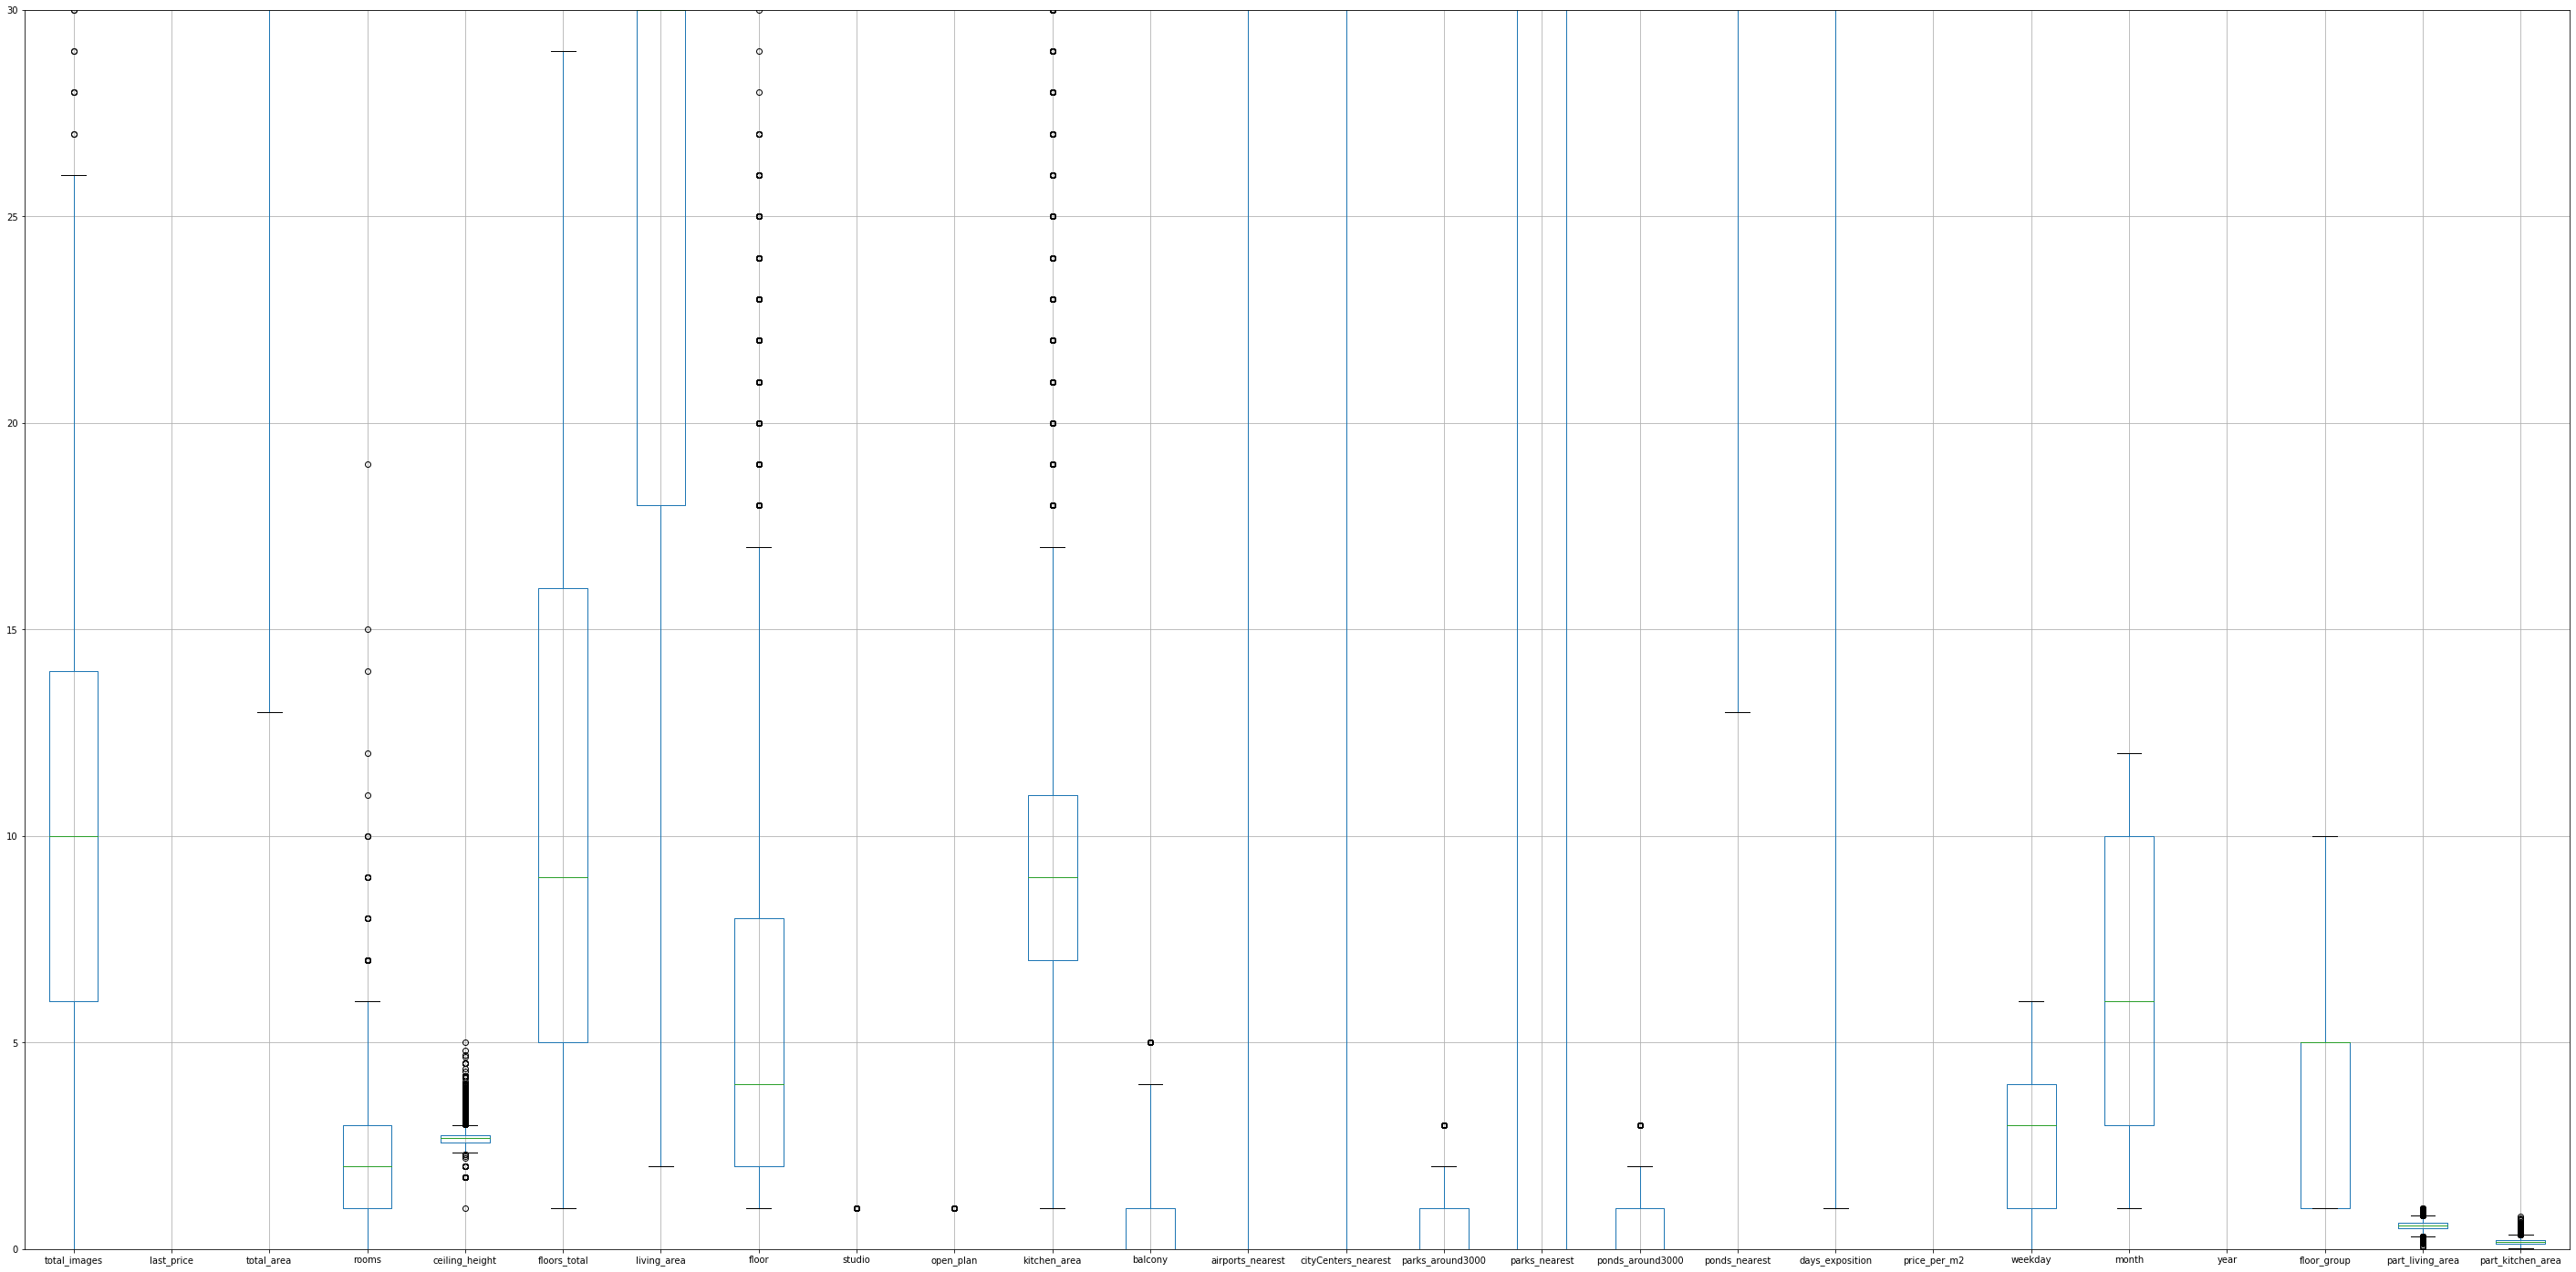

In [78]:
extragood_day.boxplot(figsize=(50,25))
plt.ylim(0,30)

Выбросы есть у таких показателей как высота потолков и площадь кухни. Выполним группировку и посмотрим подробнее разброс цен у квартир время продажи которых заняло менее 2-х лет

In [79]:
good_day['price_per_m2_group']=pd.cut(good_day['price_per_m2'],10)

C:\Users\MaNi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
good_day.groupby('price_per_m2_group')['last_price','total_area'].agg(['count','median','mean'])

C:\Users\MaNi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


last_price                            total_area  \
                            count       median          mean      count   
price_per_m2_group                                                        
(6062.462, 197915.8]        22119    4550000.0  5.628515e+06      22119   
(197915.8, 387869.6]          429   23800000.0  2.883140e+07        429   
(387869.6, 577823.4]           55   68500000.0  8.701422e+07         55   
(577823.4, 767777.2]           16  108500000.0  1.044554e+08         16   
(767777.2, 957731.0]            5  122000000.0  1.116000e+08          5   
(957731.0, 1147684.8]           2  262650000.0  2.626500e+08          2   
(1147684.8, 1337638.6]          0          NaN           NaN          0   
(1337638.6, 1527592.4]          0          NaN           NaN          0   
(1527592.4, 1717546.2]          1  289238400.0  2.892384e+08          1   
(1717546.2, 1907500.0]          2  546500000.0  5.465000e+08          2   

                                           
                       median        mean  
price_per_m2_group                         
(6062.462, 197915.8]     51.0   58.048239  
(197915.8, 387869.6]    100.0  113.265734  
(387869.6, 577823.4]    153.0  189.836364  
(577823.4, 767777.2]    171.0  169.312500  
(767777.2, 957731.0]    145.0  132.400000  
(957731.0, 1147684.8]   262.5  262.500000  
(1147684.8, 1337638.6]    NaN         NaN  
(1337638.6, 1527592.4]    NaN         NaN  
(1527592.4, 1717546.2]  187.0  187.000000  
(1717546.2, 1907500.0]  295.0  295.000000

483 квартиры с ценой от 190849 до 381588 за кв метр. Цена выше медианной более чем в 2 раза. Исключим из дальнейшего анализа квартиры с очень высокой ценой более чем в 2 раза

In [81]:
good_sell=good_day[good_day['price_per_m2']<190850]

In [82]:
good_sell.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_group,part_living_area,part_kitchen_area
count,22061.000000,2.206100e+04,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,...,16767.000000,8212.000000,22061.000000,22061.00000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000
mean,9.841032,5.596987e+06,57.962241,2.037079,2.712544,10.745932,33.121255,5.919269,9.933321,0.112733,...,0.736447,526.894788,146.507593,94673.23018,2.572368,6.407688,2017.459952,5.189248,0.562635,0.182561
std,5.650831,4.132587e+06,30.921765,1.047807,0.219295,6.629110,19.851078,4.912144,5.246079,1.321669,...,0.912763,277.482799,131.899203,30816.73695,1.789560,3.485218,0.958236,3.240055,0.101191,0.068166
min,0.000000,4.300000e+05,13.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,-1.000000,...,0.000000,13.000000,1.000000,7962.00000,0.000000,1.000000,2014.000000,1.000000,0.038462,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.581279,5.000000,18.000000,2.000000,7.000000,-1.000000,...,0.000000,305.000000,45.000000,76271.00000,1.000000,3.000000,2017.000000,1.000000,0.500000,0.133333
50%,9.000000,4.540000e+06,51.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,515.000000,112.000000,94545.00000,3.000000,6.000000,2018.000000,5.000000,0.562500,0.172414
75%,14.000000,6.500000e+06,67.000000,3.000000,2.750000,16.000000,41.000000,8.000000,11.000000,1.000000,...,1.000000,737.000000,180.000000,112676.00000,4.000000,10.000000,2018.000000,10.000000,0.629032,0.218750
max,50.000000,9.150000e+07,590.000000,19.000000,5.000000,60.000000,409.000000,33.000000,100.000000,5.000000,...,3.000000,1344.000000,631.000000,190789.00000,6.000000,12.000000,2019.000000,10.000000,1.000000,0.787879


в выборку попали двухкомнатные квартины общей площадью 51 м кв (минимум 13, максимум 590). Со средней высотой потолков. В основном это 9-ми этажные дома  квартиры в основном продаются на 4 этаже. Продажи в основном осуществляются за 112 дня за 94545 руб за кв м. В основном продажи были в 2018 году.
Также интересно было бы по отдельности проанализировать квартиры с высокими, низкими и средними ценами (какие факторы влияют на цены, характеристики данных квартир..)

In [83]:
#изучим факторы влияющие на стоимость недвижимости
# создадим отдельно таблицу с факторами
column=['last_price','price_per_m2','total_area','rooms','floor_group','weekday','month','year','cityCenters_nearest','parks_around3000','ponds_around3000']
price_factor=pd.DataFrame(data=good_sell,columns=column)

In [84]:
display(price_factor.head(10))
len(price_factor)

,last_price,price_per_m2,total_area,rooms,floor_group,weekday,month,year,cityCenters_nearest,parks_around3000,ponds_around3000
0,13000000,120370,108,3,5,3,3,2019,16028.0,1.0,2.0
1,3350000,83750,40,1,1,1,12,2018,18603.0,0.0,0.0
2,5196000,92785,56,2,10,3,8,2015,13933.0,1.0,2.0
4,10000000,100000,100,2,10,1,6,2018,8098.0,2.0,1.0
5,2890000,96333,30,1,5,0,9,2018,-1.0,-1.0,NaN
6,3700000,100000,37,1,5,3,11,2017,19143.0,0.0,0.0
7,7915000,111478,71,2,5,3,4,2019,11634.0,0.0,0.0
8,2900000,87878,33,1,10,2,5,2018,-1.0,-1.0,NaN
9,5400000,88524,61,3,5,6,2,2017,15008.0,0.0,0.0
10,5050000,129487,39,1,5,3,11,2017,13878.0,1.0,2.0


22061

In [85]:
print('на цену влияет м2:',price_factor['price_per_m2'].corr(price_factor['total_area']))
print('на цену влияет количество комнат:',price_factor['price_per_m2'].corr(price_factor['rooms']))
print('на цену влияет удаленность от центра:',price_factor['price_per_m2'].corr(price_factor\
                               [price_factor['cityCenters_nearest']>=0]['cityCenters_nearest']))
print('на цену влияет сезонность:',price_factor['price_per_m2'].corr(price_factor['month']))
print('на цену влияет год:',price_factor['price_per_m2'].corr(price_factor['year']))
print('на цену влияет день недели:',price_factor['price_per_m2'].corr(price_factor['weekday']))
print('на цену влияет этаж:',price_factor['price_per_m2'].corr(price_factor['floor_group']))
print('на цену влияет наличие парков:',price_factor['price_per_m2'].corr(price_factor[price_factor['parks_around3000']>=0]\
                                                                         ['parks_around3000']))
print('на цену влияет наличие прудов:',price_factor['price_per_m2'].corr(price_factor[price_factor['ponds_around3000']>=0]\
                                                                         ['ponds_around3000']))

на цену влияет м2: 0.11490612366386842
на цену влияет количество комнат: -0.07690893508320698
на цену влияет удаленность от центра: -0.39984364785299115
на цену влияет сезонность: -0.0043458114920970296
на цену влияет год: 0.06975838919128045
на цену влияет день недели: -0.017804738315904838
на цену влияет этаж: 0.0557949896239338
на цену влияет наличие парков: 0.11501253908778605
на цену влияет наличие прудов: 0.1173181608426209


Как показывают коэффициенты корреляции больше всего на цену за квадратый метр оказавает влияние факторы: площадь , удаленность от центра,наличие прудов и парков поблизости. Больше всего из всех факторов оказывает удаленность от центра (причем зависимость обратная: чем больше растояние от центра тем ниже цена м кв)

In [86]:
corr_matrix=price_factor.corr()

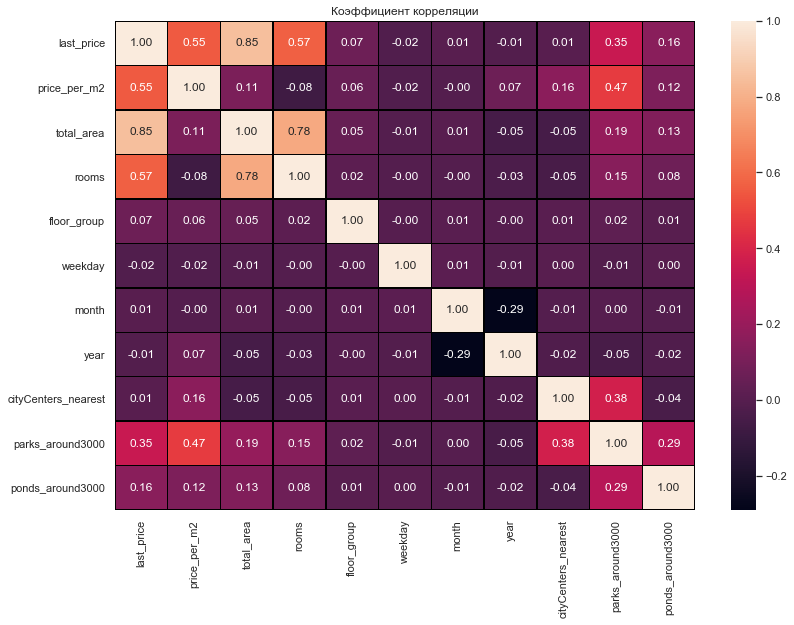

In [87]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Коэффициент корреляции')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, linecolor='black')

Большая корреляция между общей площадью и количеством комнат, общей площадью и ценой квартиры (что в принципе логично)

Text(0.5, 1.0, 'Динамика средней цены за метр квадратный ')

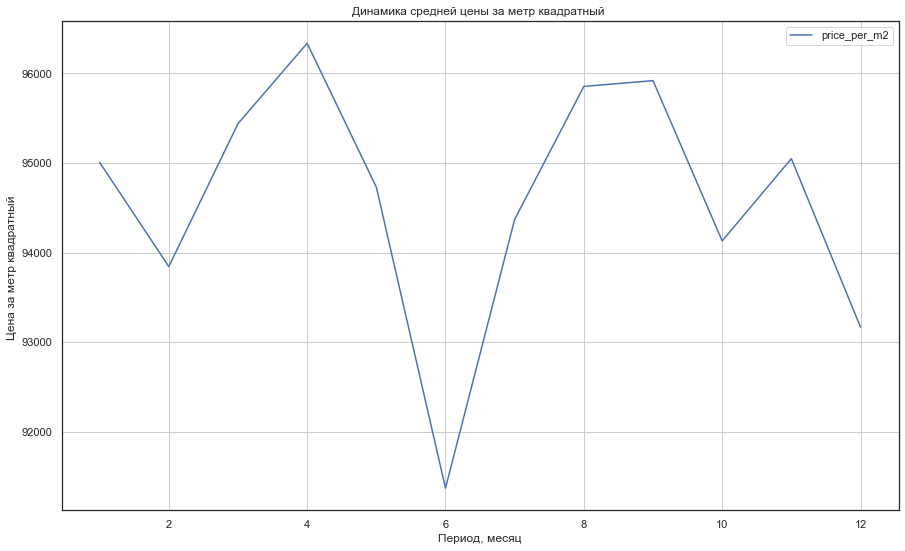

In [88]:
good_sell.pivot_table(index='month',values='price_per_m2',aggfunc='mean').sort_values(by='month',ascending='False')\
                .plot(grid=True,figsize=(15,9))
plt.xlabel('Период, месяц') 
plt.ylabel('Цена за метр квадратный ') 
plt.title('Динамика средней цены за метр квадратный ')

На продажи оказывает влияние сезонность. Посмотрим в изменение цены в разные года

Text(0.5, 1.0, 'Динамика средней цены за метр квадратный ')

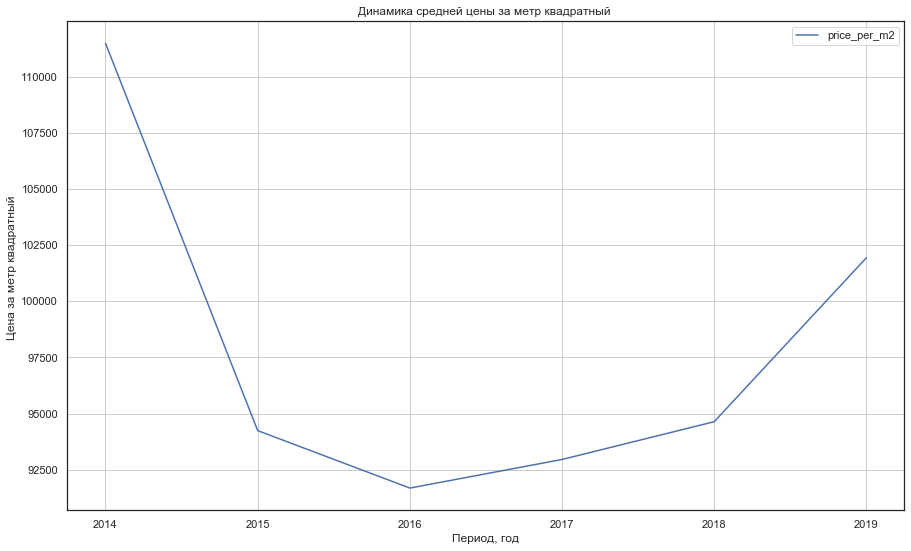

In [89]:
good_sell.pivot_table(index='year',values='price_per_m2',aggfunc='mean').sort_values(by='year',ascending='False')\
                   .plot(grid=True,figsize=(15,9),legend=True)
plt.xlabel('Период, год') 
plt.ylabel('Цена за метр квадратный ') 
plt.title('Динамика средней цены за метр квадратный ')

В 2016 году зыла самая низкая цена недвижимости. Постепенное повышение цены началось в 2017 году , продолжилось в 2018 и в 2019. Большую выгоду получили те кто продал квартиры в 2014 году. Посмотрим как меняются квартиры по дням недели

Text(0.5, 1.0, 'Динамика средней цены за метр квадратный ')

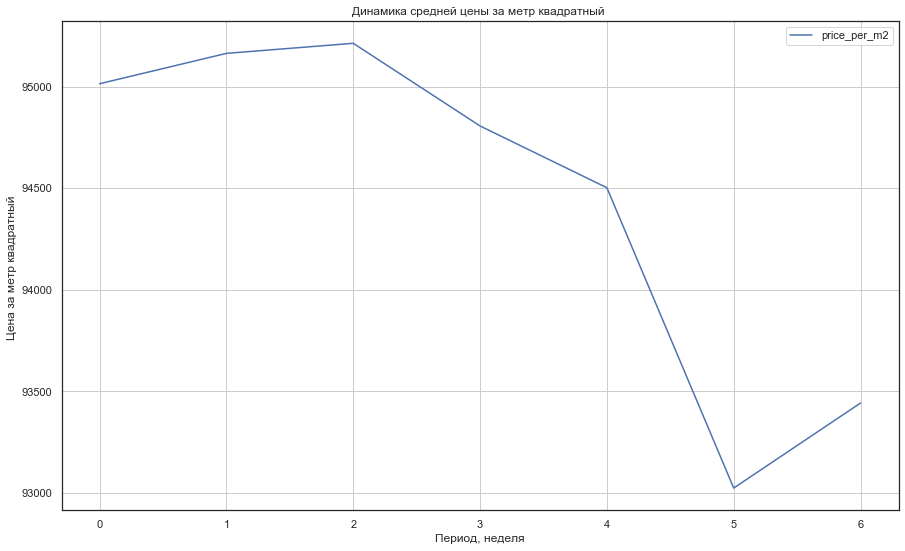

In [90]:
good_sell.pivot_table(index='weekday',values='price_per_m2',aggfunc='mean').sort_values(by='weekday',ascending='False')\
                  .plot(grid=True,figsize=(15,9),legend=True)
plt.xlabel('Период, неделя') 
plt.ylabel('Цена за метр квадратный ') 
plt.title('Динамика средней цены за метр квадратный ')

Лучше всего квартиры продавать в начале недели. В выходные цена на порядок ниже средней.

In [91]:
# изучим населённые пункты с наибольшим числом объявлений
# больше всего продаж:
good_sell.groupby('locality_name')['price_per_m2'].count().sort_values(ascending=False).head(10)


locality_name
Санкт-Петербург      14404
посёлок Мурино         503
посёлок Шушары         426
Всеволожск             381
Пушкин                 348
Колпино                330
посёлок Парголово      318
Гатчина                290
деревня Кудрово        278
Выборг                 225
Name: price_per_m2, dtype: int64

In [92]:
top_city=good_sell.groupby('locality_name')['price_per_m2'].count().sort_values(ascending=False).head(10).index
good_sell.query('locality_name in @top_city').pivot_table(index='locality_name', values='price_per_m2',aggfunc='mean')

,price_per_m2
locality_name,
Всеволожск,67598.614173
Выборг,58351.440000
Гатчина,69236.210345
Колпино,75601.472727
Пушкин,102475.893678
Санкт-Петербург,108230.149125
деревня Кудрово,93188.812950
посёлок Мурино,86519.214712
посёлок Парголово,90500.267296


In [93]:
price_max=good_sell['price_per_m2'].max()
print('самая высокая cтоимость ',price_max)

самая высокая cтоимость  190789


In [94]:
max_sell=good_sell[good_sell['price_per_m2']==price_max]['locality_name']
print('самая высокая стоимость жилья в ', max_sell )

самая высокая стоимость жилья в  20815    Санкт-Петербург
Name: locality_name, dtype: object


In [95]:
price_min=good_sell['price_per_m2'].min()
print('самая низкая стоимость ',price_min)

самая низкая стоимость  7962


In [96]:
min_sell=good_sell[good_sell['price_per_m2']==price_min]['locality_name']
print('самая низкая стоимость жилья в ', min_sell )

самая низкая стоимость жилья в  14911    посёлок станции Свирь
Name: locality_name, dtype: object


Больше всего объявлений из Санкт-Петербурга. Средняя цена за м кв в этом городе 115042 руб. Самая высокая стоимость (190789) и самая низкая (7962) также в Санкт-Петербурге
Если анализировать топ-10 городов по цене за кв метр: самая высокая цена (108222) в Санкт-Петербурге и самая низкая (58351) в Выборге

In [97]:
#Расчитаем среднюю цену м кв для каждого километра в Санкт-Петербурге

# Cделаем срез таблицы по Санкт-Петербург
spb=good_sell.loc[(df['locality_name']=='Санкт-Петербург')&(good_sell['cityCenters_nearest']>0)]
print(len(spb))

14354


In [98]:
# создадим столбец с километрами
spb['to_center']=(spb['cityCenters_nearest']/1000).astype(int)

C:\Users\MaNi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
# расчитаем среднюю цену км
spb['km_price']=spb.groupby('to_center')['price_per_m2'].mean()

C:\Users\MaNi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


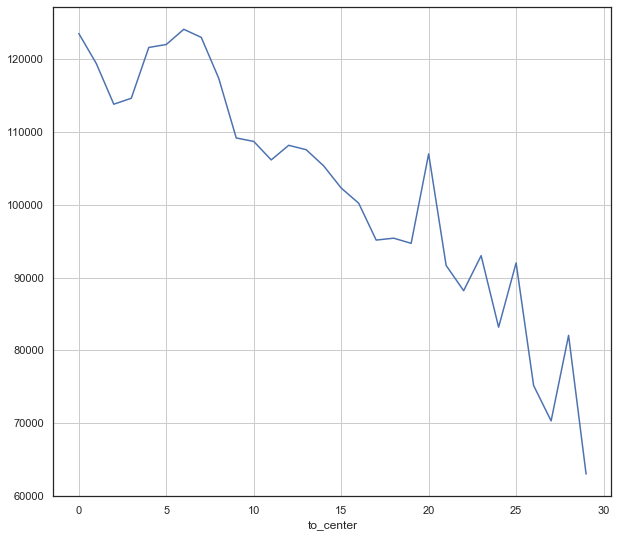

In [100]:
spb.groupby('to_center')['price_per_m2'].mean().plot(grid=True,figsize=(10,9))

Чем дальше от центра - тем цена выше.

In [101]:
# Изучим недвижимость г.Санкт-Петербурга
column=['last_price','price_per_m2','total_area','rooms','floor_group','floor','weekday','month','year','to_center','ceiling_height']
spb_factor=pd.DataFrame(data=spb,columns=column)

In [102]:
# посмотрим средние, максимольные, минимальные значения
spb.pivot_table(index='locality_name',values=['total_area','price_per_m2','rooms','ceiling_height']\
                   ,aggfunc=['mean','max','min'])

mean                                      \
                ceiling_height   price_per_m2     rooms total_area   
locality_name                                                        
Санкт-Петербург       2.729421  108177.446287  2.126724  61.448168   

                           max                                          min  \
                ceiling_height price_per_m2 rooms total_area ceiling_height   
locality_name                                                                 
Санкт-Петербург            4.7       190789    19        590            1.0   

                                               
                price_per_m2 rooms total_area  
locality_name                                  
Санкт-Петербург        15384     0         13

In [103]:
# для удобства сравнения добавим сводную таблицу по всем квартирам:
flat.pivot_table(index='is_apartment',values=['total_area','price_per_m2','rooms','ceiling_height'],aggfunc=['mean','max','min'])

mean                                      \
             ceiling_height   price_per_m2     rooms total_area   
is_apartment                                                      
0                  2.722046   99774.160902  2.070619    60.0699   
1                  3.048893  148951.700000  2.080000    83.0800   

                        max                                          min  \
             ceiling_height price_per_m2 rooms total_area ceiling_height   
is_apartment                                                               
0                       5.0      1907500    19        900            1.0   
1                       4.5       600000     7        507            2.5   

                                            
             price_per_m2 rooms total_area  
is_apartment                                
0                    7962     0         12  
1                   40816     1         20

Если сравнивать квартиры в Санкт-Петербурге с общей выборкой - то характеристики получатся примерно одинаковые: квартиры в СПБ также как и везде страндартной высоты. Цена за м кв чуть выше чем в у остальных. в основмом двухкомнатные. Общая площадь чуть больше остальных.

In [104]:
spb.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,days_exposition,price_per_m2,weekday,month,year,floor_group,part_living_area,part_kitchen_area,to_center,km_price
count,14354.000000,1.435400e+04,14354.000000,14354.000000,14354.000000,14354.000000,14354.000000,14354.000000,14354.000000,14354.000000,...,14354.000000,14354.000000,14354.000000,14354.000000,14354.000000,14354.000000,14354.000000,14354.000000,14354.000000,18.000000
mean,10.152083,6.693933e+06,61.448168,2.126724,2.729421,11.526055,35.226278,6.293019,10.402815,0.104918,...,145.210325,108177.446287,2.561028,6.434583,2017.448237,5.245994,0.564067,0.181140,11.432771,97542.096799
std,5.710673,4.493870e+06,34.489947,1.110130,0.239547,6.400772,22.081882,4.935970,5.708318,1.326564,...,132.427652,24365.666036,1.779550,3.454848,0.969975,3.084115,0.101244,0.068236,4.703081,17484.308978
min,0.000000,1.190000e+06,13.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,-1.000000,...,1.000000,15384.000000,0.000000,1.000000,2014.000000,1.000000,0.038462,0.025381,0.000000,63011.333333
25%,6.000000,4.150000e+06,41.000000,1.000000,2.581279,5.000000,19.000000,3.000000,7.000000,-1.000000,...,45.000000,90909.000000,1.000000,3.000000,2017.000000,5.000000,0.500000,0.133333,9.000000,91741.739202
50%,10.000000,5.350000e+06,53.000000,2.000000,2.700000,9.000000,31.000000,5.000000,9.000000,0.000000,...,110.000000,104039.500000,3.000000,6.000000,2017.000000,5.000000,0.562500,0.171429,12.000000,95269.643358
75%,14.000000,7.588750e+06,71.000000,3.000000,2.778731,16.000000,43.000000,9.000000,12.000000,1.000000,...,180.000000,121707.000000,4.000000,10.000000,2018.000000,5.000000,0.631579,0.216216,15.000000,109040.889010
max,50.000000,9.150000e+07,590.000000,19.000000,4.700000,52.000000,409.000000,33.000000,100.000000,5.000000,...,631.000000,190789.000000,6.000000,12.000000,2019.000000,10.000000,1.000000,0.787879,29.000000,123504.918033


In [105]:
good_sell.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_group,part_living_area,part_kitchen_area
count,22061.000000,2.206100e+04,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,...,16767.000000,8212.000000,22061.000000,22061.00000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000,22061.000000
mean,9.841032,5.596987e+06,57.962241,2.037079,2.712544,10.745932,33.121255,5.919269,9.933321,0.112733,...,0.736447,526.894788,146.507593,94673.23018,2.572368,6.407688,2017.459952,5.189248,0.562635,0.182561
std,5.650831,4.132587e+06,30.921765,1.047807,0.219295,6.629110,19.851078,4.912144,5.246079,1.321669,...,0.912763,277.482799,131.899203,30816.73695,1.789560,3.485218,0.958236,3.240055,0.101191,0.068166
min,0.000000,4.300000e+05,13.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,-1.000000,...,0.000000,13.000000,1.000000,7962.00000,0.000000,1.000000,2014.000000,1.000000,0.038462,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.581279,5.000000,18.000000,2.000000,7.000000,-1.000000,...,0.000000,305.000000,45.000000,76271.00000,1.000000,3.000000,2017.000000,1.000000,0.500000,0.133333
50%,9.000000,4.540000e+06,51.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,515.000000,112.000000,94545.00000,3.000000,6.000000,2018.000000,5.000000,0.562500,0.172414
75%,14.000000,6.500000e+06,67.000000,3.000000,2.750000,16.000000,41.000000,8.000000,11.000000,1.000000,...,1.000000,737.000000,180.000000,112676.00000,4.000000,10.000000,2018.000000,10.000000,0.629032,0.218750
max,50.000000,9.150000e+07,590.000000,19.000000,5.000000,60.000000,409.000000,33.000000,100.000000,5.000000,...,3.000000,1344.000000,631.000000,190789.00000,6.000000,12.000000,2019.000000,10.000000,1.000000,0.787879


также для сравнение можно применить describe 2-x таблиц.

In [106]:
# построим гистограммы для СПБ:
column=['last_price','price_per_m2','total_area','rooms','ceiling_height']
factor=pd.DataFrame(data=spb,columns=column)

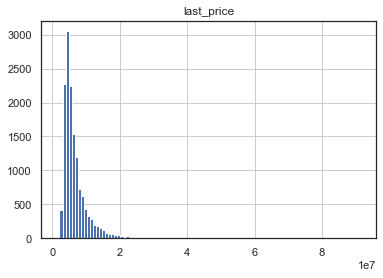

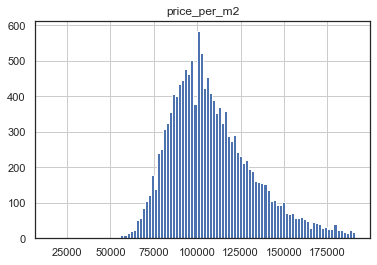

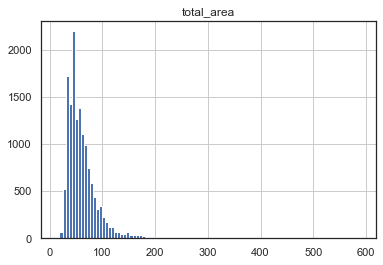

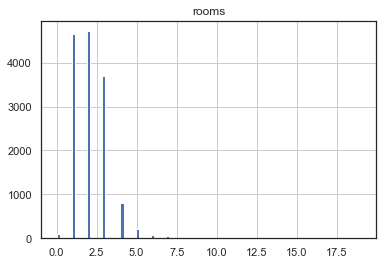

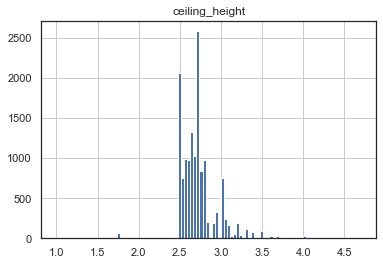

In [107]:
for column in factor:
    spb.hist(column,bins=100)

In [108]:
# рассмотрим влияние числа комнат, этаж, удалённости от центра, даты размещения объявления
print('на цену влияет количество комнат:',spb['price_per_m2'].corr(spb['rooms']))
print('на цену влияет удаленность от центра:',spb['price_per_m2'].corr(spb['to_center']))
print('на цену влияет этаж:',spb['price_per_m2'].corr(spb['floor']))
print('на цену влияет неделя:',spb['price_per_m2'].corr(spb['weekday']))
print('на цену влияет месяц:',spb['price_per_m2'].corr(spb['month']))
print('на цену влияет год:',spb['price_per_m2'].corr(spb['year']))

на цену влияет количество комнат: -0.16185317483402664
на цену влияет удаленность от центра: -0.30338208502980313
на цену влияет этаж: 0.1687162530766446
на цену влияет неделя: -0.007754057929191549
на цену влияет месяц: -0.02326055061637251
на цену влияет год: 0.14096373359373668


Если посмотреть на факторы влияющие на цену, то из всех изученных факторов влияние оказывает только один - удаленность от центра : чем больше растояние от центра - тем ниже цена квартир.

### Общий вывод

Была проведена большая работа по анализу объявлнений недвижимости. Прежде чем приступить к анализу информации преобработали данные (заполнены пропуски, добавлена недостающая информация). В ходе аналица были выявлены некорректные значения: высота потолков более 5 метров, цена за м кв менее 1000, длительность объявления более 630 дней.
Были отобраны объявления с длительностью менее 630 дней и с ценой за м кв не более 190000.
В основном продавались двухкомнатные квартины общей площадью 51 м кв со средней высотой потолков. В основном это 9-ми этажные дома; квартиры в основном продаются на 4 этаже. Продажи в основном осуществляются за 112 дня за 94545 руб за кв м. В основном продажи были в 2018 году. Самая быстрая продажа - за 1 день, а самая долгая 1580 дней. 
Больше всего на цену за квадратый метр оказавает влияние факторы: площадь , удаленность от центра, наличие прудов и парков поблизости. Также цены имеют тенденцию к повышению с марта по апрель и с июля по сентябрь. Самая низкая цена была в 2016г, самая высокая в 2014. Лучше всего квартиры продавать в начале недели. В выходные цена на порядок ниже средней.
Больше всего объявлений в Санкт-Петербурге. И в этом городе самая высокая средняя цена, самая низкая (среди топ-городов по количеству объявлений) в Выборге. Если анализоровать изменение средней цены в Санкт-Петербурге в зависимости от удаленности от центра - то чем дальше от центра тем ниже средняя цена. Если рассматривать рынок Санкт-Петербурга  - то характеристики квартир чуть выше чем в остальных. Потолки в СПБ также как и везде страндартной высоты. Цена за м кв чуть выше чем в у остальных. В основмом двухкомнатные квартиры. Общая площадь чуть больше остальных (61 м кв). Стоимость квартир 108169 руб.

